# Data Wrangling and EDA

In [1]:
# libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.isri import ISRIStemmer

In [2]:
df = pd.read_excel("/Users/muneraalrajhi/Desktop/Capstone Project/CapstoneProject/data/Poems.xlsx")

In [3]:
df.head()

,Poem,Number of Versus,Poet,Century,Label,Type,Metre
0,أصابت سهام الحتف يا حسرة الدهرصريح قريش والخلا...,46.0,أبو المحاسن الكربلائي,العراق,قصائد عتاب,عموديه,بحر الطويل
1,جئت يا دهر بالرزية بكراغادرت مهجة الهدى وهي حر...,37.0,أبو المحاسن الكربلائي,العراق,قصائد عتاب,عموديه,بحر الخفيف
2,وشادن أورثني حبهكالائتلافيين حزنا طويلعز علي ا...,14.0,أبو المحاسن الكربلائي,العراق,قصائد عتاب,عموديه,بحر السريع
3,قد كانت الآمال معقودةفيك وللأمال تضليلواليوم ل...,11.0,أبو المحاسن الكربلائي,العراق,قصائد عتاب,عموديه,بحر السريع
4,سواي على الضيم يبقى رهيناوغيري يرى ضارعا مستكي...,87.0,أبو المحاسن الكربلائي,العراق,قصائد عتاب,عموديه,بحر المتقارب


In [4]:
df.shape

(11191, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11191 entries, 0 to 11190
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Poem              11189 non-null  object 
 1   Number of Versus  10997 non-null  float64
 2   Poet              11191 non-null  object 
 3   Century           11190 non-null  object 
 4   Label             11191 non-null  object 
 5   Type              11191 non-null  object 
 6   Metre             11191 non-null  object 
dtypes: float64(1), object(6)
memory usage: 612.1+ KB


#### handle missing values and duplicates:

In [6]:
df.isnull().sum()

Poem                  2
Number of Versus    194
Poet                  0
Century               1
Label                 0
Type                  0
Metre                 0
dtype: int64

<AxesSubplot:>

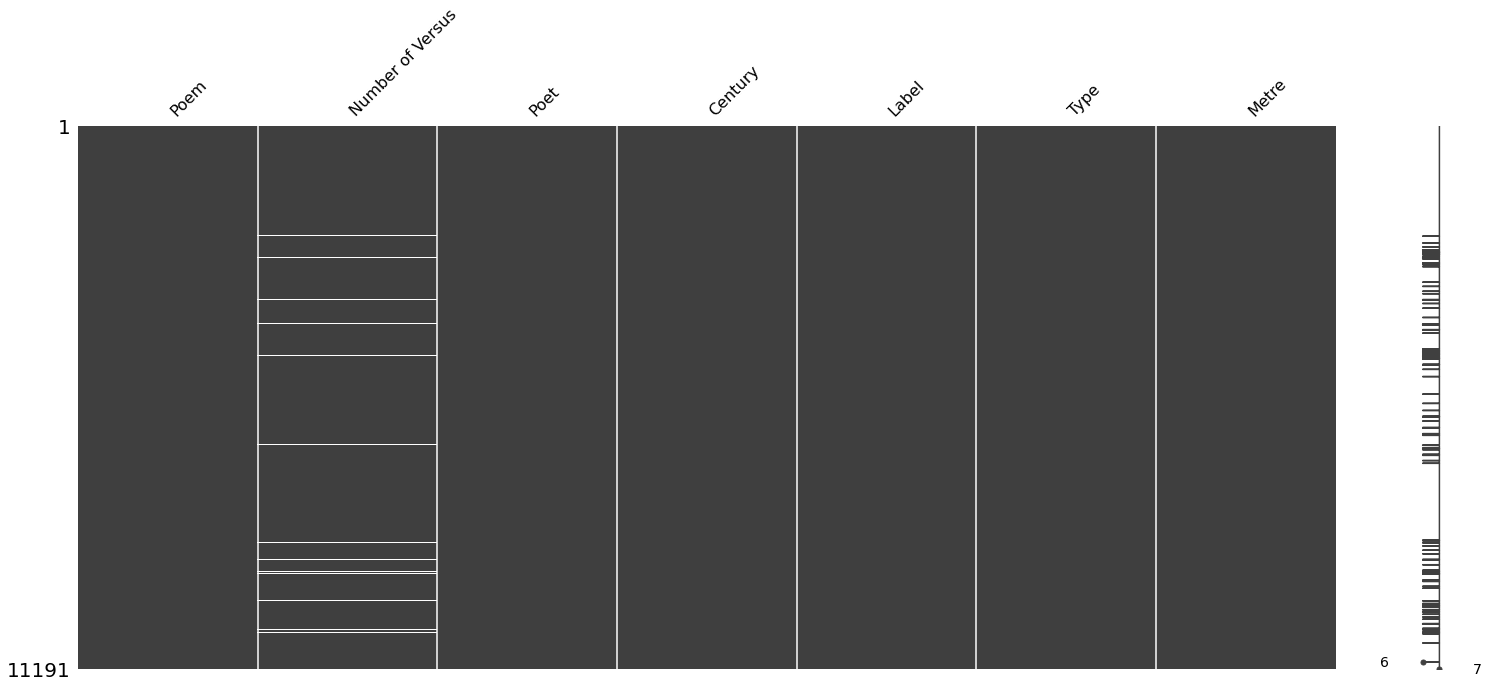

In [7]:
#plot missing values
msno.matrix(df)

In [8]:
#drop missing values
df = df.dropna()

In [9]:
# check for duplicates
df.duplicated().sum()

4

In [10]:
# drop duplicates 
df = df.drop_duplicates()

In [11]:
df.nunique()

Poem                10966
Number of Versus      152
Poet                  425
Century                23
Label                   8
Type                    1
Metre                  65
dtype: int64

In [12]:
df["Label"].value_counts()

قصائد رثاء       2451
قصائد مدح        1454
قصائد حزينه      1363
قصائد عتاب       1359
قصائد شوق        1295
قصائد رومنسيه    1111
قصائد هجاء       1047
قصائد فراق        910
Name: Label, dtype: int64

## Data Cleaning

In [13]:
# Convert Number of Versus type to object and remove the decimal
df['Number of Versus'] = df['Number of Versus'].astype(str).replace('\.0', '', regex=True)

# Remove \n from the content 
df['Poem'] = df['Poem'].replace("\xa0"," ", regex=True)
df['Poem'] = df['Poem'].replace('\n',' ', regex=True)
df['Poem'] = df['Poem'].replace("\t"," ", regex=True)
df['Poem'] = df['Poem'].replace("ًٌٍَُِّْ"," ", regex=True)

# Replac non relative Metre to NaN
df.loc[df['Metre'].str.contains('قافية',na=False), 'Metre'] = np.nan

# Rename the labels 
df["Label"] = df["Label"].replace(['قصائد رثاء'],'رثاء')
df["Label"] = df["Label"].replace(['قصائد مدح'],'مدح')
df["Label"] = df["Label"].replace(['قصائد حزينه'],'حزن')
df["Label"] = df["Label"].replace(['قصائد عتاب'],'عتاب')
df["Label"] = df["Label"].replace(['قصائد شوق'],'شوق')
df["Label"] = df["Label"].replace(['قصائد رومنسيه'],'رومنسيه')
df["Label"] = df["Label"].replace(['قصائد هجاء'],'هجاء')
df["Label"] = df["Label"].replace(['قصائد فراق'],'فراق')



In [14]:
df.sample(10)

,Poem,Number of Versus,Poet,Century,Label,Type,Metre
9064,إنما الطيف الملم فرح يتلوه هم قلما يحمد أمر لي...,2,الوزير المهلبي,العصر العباسي,حزن,عموديه,بحر مجزوء الرمل
7553,ثلاث تقود الصعب وهي حميدة فلا حيلة من بعدها لل...,2,المعولي العماني,عمان,رومنسيه,عموديه,بحر الطويل
6176,يا ذا الذي لا أهجره وعلى القلى لا أعذره ماذا ي...,24,ابن الزيات,العصر العباسي,رثاء,عموديه,بحر مجزوء الكامل
7306,أتعرف أطلالا بميسرة اللوى إلى أرعب قد حالفتك ب...,8,وضاح اليمن,العصر الاموي,رثاء,عموديه,بحر الطويل
9318,لعل الخيال العامري إذا سرى يدل عيون الهاشمي عل...,4,ابن الهبارية,العصر العباسي,حزن,عموديه,NaN
7625,سفرت فهيجنا الصباح الثاني وبدت لنا فتثلث القمر...,36,عبد الرحمن السويدي,العراق,رومنسيه,عموديه,بحر الكامل
7983,حلو الشمائل ذو المحاسن وجهه نور الجمال عليه أب...,2,المفتي عبداللطيف فتح الله,لبنان,رومنسيه,عموديه,بحر الكامل
7613,مضى المحبون من قبلي على سنن وفي الهوى عملوا با...,22,صالح مجدي بك,مصر,رومنسيه,عموديه,بحر البسيط
8382,في بحرك ما المراد غير الغرق في عشقك ما طاب كرى...,2,نظام الدين الأصفهاني,العصر المملوكي,رومنسيه,عموديه,بحر الدوبيت
8933,يا غرير الدموع أين الدموع كم تريد البكا وما تس...,13,عباس محمود العقاد,مصر,حزن,عموديه,بحر الخفيف


### Data visualization

In [15]:
poemsperlabel = df.groupby('Label').size()
poemsperlabel

Label
حزن        1363
رثاء       2451
رومنسيه    1111
شوق        1295
عتاب       1359
فراق        910
مدح        1454
هجاء       1047
dtype: int64

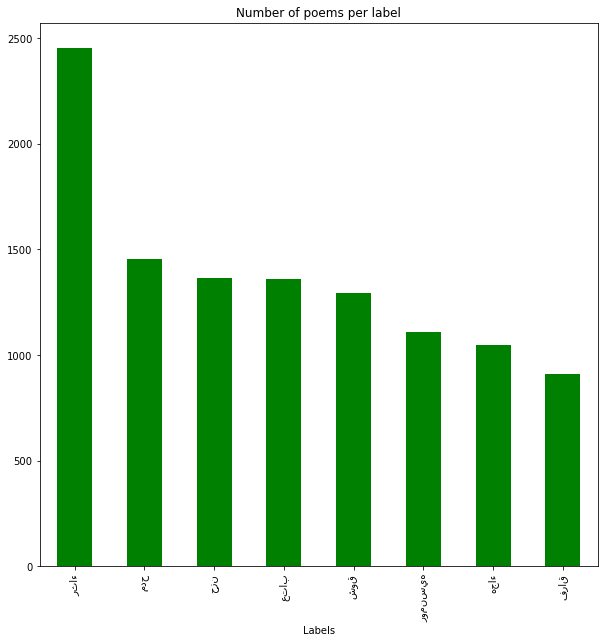

In [16]:
# Number of poems per label
poemsperlabel.sort_values(ascending=False).plot(kind='bar',figsize=(10,10), color='g')
plt.title(('Number of poems per label'))
plt.xlabel("Labels");


In [17]:
poemsperpoet = df.groupby('Metre').size()
poemsperpoet

Metre
بحر أحذ الكامل          93
بحر البسيط            1542
بحر الخفيف             846
بحر الدوبيت            393
بحر الرجز              257
بحر الرمل              226
بحر السريع             473
بحر السلسلة              3
بحر الطويل            2690
بحر القوما               1
بحر الكامل            1533
بحر المتدارك            15
بحر المتقارب           427
بحر المجتث             132
بحر المديد              66
بحر المضارع              1
بحر المقتضب              2
بحر المنسرح            213
بحر المواليا            13
بحر الهزج               42
بحر الوافر             879
بحر مجزوء البسيط        12
بحر مجزوء الخفيف        51
بحر مجزوء الدوبيت        1
بحر مجزوء الرجز         88
بحر مجزوء الرمل        159
بحر مجزوء السريع         1
بحر مجزوء الطويل         1
بحر مجزوء الكامل       275
بحر مجزوء المتقارب       8
بحر مجزوء المجتث         2
بحر مجزوء المديد         1
بحر مجزوء الوافر        57
بحر مجزوء موشح           2
بحر مخلع البسيط        150
بحر مخلع الكامل          1
بحر مشطور الرجز       

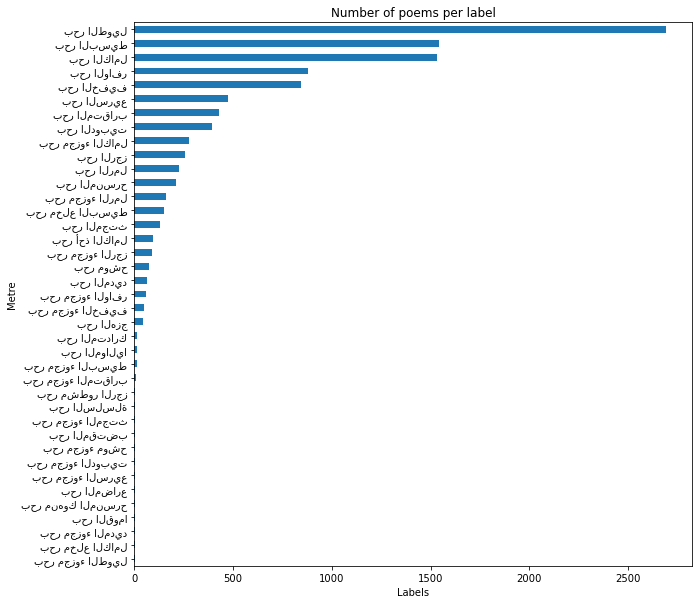

In [18]:
# Number of poems per label
poemsperpoet.sort_values().plot(kind='barh',figsize=(10,10))
plt.title(('Number of poems per label'))
plt.xlabel("Labels");

In [19]:
poemsperCentury = df.groupby('Century').size()
poemsperCentury

Century
الأردن               6
الجزائر              7
السعودية             5
العراق             411
العصر الأندلسي     671
العصر الاسلامي       8
العصر الاموي       772
العصر الايوبي      602
العصر الجاهلي       77
العصر العباسي     3029
العصر العثماني     833
العصر المملوكي    1594
المخضرمون          268
المغرب              28
اليمن               50
تونس               101
سوريا              194
عمان               151
فلسطين              13
لبنان              922
ليبيا               26
مصر               1219
موريتانيا            3
dtype: int64

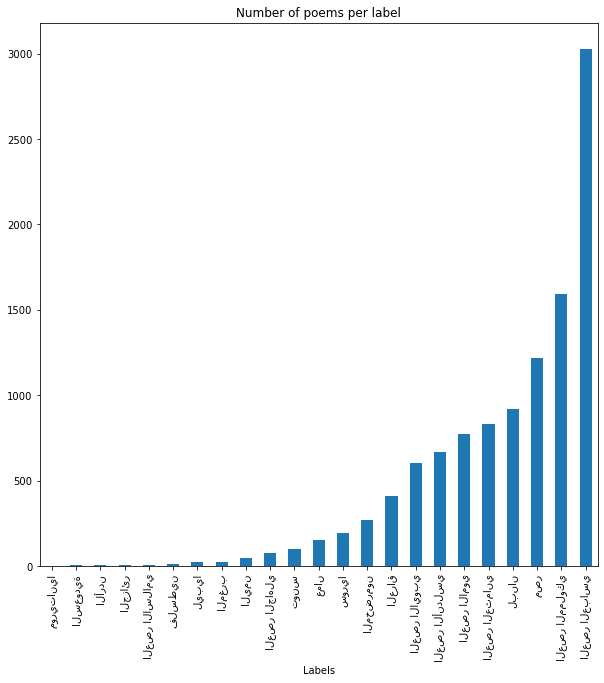

In [20]:
# Number of poems per label
poemsperCentury.sort_values().plot(kind='bar',figsize=(10,10))
plt.title(('Number of poems per label'))
plt.xlabel("Labels");

### Text Data Processing

In [21]:
nltk.download("stopwords")
arabic_stopwords = set(nltk.corpus.stopwords.words("arabic"))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/muneraalrajhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Expande Arabic StopWords
data = []
with open('/Users/muneraalrajhi/Desktop/Capstone Project/CapstoneProject/data/arabic_stop_words.txt','r') as myfile:
    for line in myfile:
        data.extend(map(str, line.rstrip('\n').split(',')))
print(data)
arabic_stopwords.update(data)

['،', 'ء', 'ءَ', 'آ', 'آب', 'آذار', 'آض', 'آل', 'آمينَ', 'آناء', 'آنفا', 'آه', 'آهاً', 'آهٍ', 'آهِ', 'أ', 'أبدا', 'أبريل', 'أبو', 'أبٌ', 'أجل', 'أجمع', 'أحد', 'أخبر', 'أخذ', 'أخو', 'أخٌ', 'أربع', 'أربعاء', 'أربعة', 'أربعمئة', 'أربعمائة', 'أرى', 'أسكن', 'أصبح', 'أصلا', 'أضحى', 'أطعم', 'أعطى', 'أعلم', 'أغسطس', 'أفريل', 'أفعل به', 'أفٍّ', 'أقبل', 'أكتوبر', 'أل', 'ألا', 'ألف', 'ألفى', 'أم', 'أما', 'أمام', 'أمامك', 'أمامكَ', 'أمد', 'أمس', 'أمسى', 'أمّا', 'أن', 'أنا', 'أنبأ', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'أنتِ', 'أنشأ', 'أنه', 'أنًّ', 'أنّى', 'أهلا', 'أو', 'أوت', 'أوشك', 'أول', 'أولئك', 'أولاء', 'أولالك', 'أوّهْ', 'أى', 'أي', 'أيا', 'أيار', 'أيضا', 'أيلول', 'أين', 'أيّ', 'أيّان', 'أُفٍّ', 'ؤ', 'إحدى', 'إذ', 'إذا', 'إذاً', 'إذما', 'إذن', 'إزاء', 'إلى', 'إلي', 'إليكم', 'إليكما', 'إليكنّ', 'إليكَ', 'إلَيْكَ', 'إلّا', 'إمّا', 'إن', 'إنَّ', 'إى', 'إياك', 'إياكم', 'إياكما', 'إياكن', 'إيانا', 'إياه', 'إياها', 'إياهم', 'إياهما', 'إياهن', 'إياي', 'إيهٍ', 'ئ', 'ا', 'ا?', 'ا?ى', 'االا', 'االتى', 'اب

In [23]:
len(arabic_stopwords)

873

df['Poem'].dropna(inplace=True)
df['Poem_token'] = df['Poem'].apply(word_tokenize)

In [30]:
df['Poem_token'] = df['Poem'].map(word_tokenize)

In [31]:
from nltk.stem.isri import ISRIStemmer
st = ISRIStemmer()

df['Poem_stem'] = df['Poem_token'].apply(lambda x: [st.stem(y) for y in x])

In [32]:
# Remove stop words
df['filtered_poems']= df['Poem_stem'].apply(lambda x: [item for item in x if item not in arabic_stopwords])

In [41]:
from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok
detokenizer = Detok()
df['Detokenize'] = df["filtered_poems"].apply(detokenizer.detokenize)

In [44]:
from nltk.probability import FreqDist

fdist1 = FreqDist(sum(df['Detokenize'].map(word_tokenize), []))

In [45]:
fdist1.most_common(50)

[('قلب', 5523),
 ('دهر', 3394),
 ('كرم', 3260),
 ('دمع', 3114),
 ('حسن', 3090),
 ('ليل', 3074),
 ('سلم', 2853),
 ('فضل', 2791),
 ('ذكر', 2650),
 ('امر', 2552),
 ('فرق', 2501),
 ('جمع', 2429),
 ('حمد', 2367),
 ('سعد', 2343),
 ('زمن', 2263),
 ('هوى', 2219),
 ('خلق', 2195),
 ('بدر', 2182),
 ('عرف', 2145),
 ('نظر', 2135),
 ('كنت', 2133),
 ('قوم', 2044),
 ('ناس', 2024),
 ('وصل', 2020),
 ('لقد', 1963),
 ('ارض', 1942),
 ('خير', 1927),
 ('ملك', 1899),
 ('عمر', 1876),
 ('مجد', 1874),
 ('شمس', 1853),
 ('عهد', 1827),
 ('صبح', 1826),
 ('اهل', 1793),
 ('وجه', 1788),
 ('حكم', 1776),
 ('شعر', 1770),
 ('قرب', 1755),
 ('بحر', 1717),
 ('عرض', 1668),
 ('جمل', 1665),
 ('ظلم', 1638),
 ('قدر', 1625),
 ('شوق', 1615),
 ('سمع', 1612),
 ('غرب', 1598),
 ('نزل', 1590),
 ('حدث', 1573),
 ('حمل', 1566),
 ('ايم', 1563)]

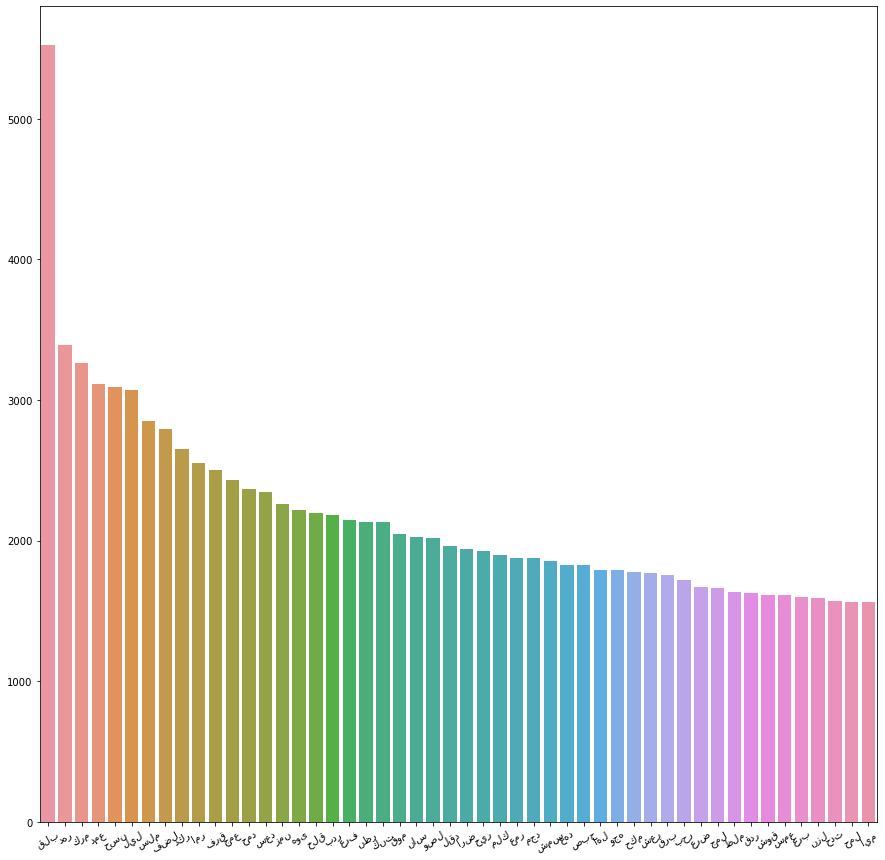

In [47]:

## Creating FreqDist for whole BoW, keeping the 50 most common tokens
all_fdist = fdist1.most_common(50)

all_fdist = pd.Series(dict(all_fdist))
fig, ax = plt.subplots(figsize=(15,15))

all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);